<a id="1"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>INTRODUCTION</center></h1>

- Data contain different variable that are sub classified further:
- 1.Demographics of the Employee 
- 2.Tenure Information 
- 3.Historical data regarding performance
- Using these data we will going to find out whether employee will stay in the company and also will see another pattern with respect to time period of person stay in the company. There are other aspects also see in the notebook you can check in visualization part.
- Using this data HR department will find out easily what type of candidate they need to take for particular job role.


<a id="2"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>LIBRARIES</center></h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import seaborn as sns

#conda install -c glemaitre imbalanced-learn
from imblearn.under_sampling import NearMiss


# Imputing missing values and scaling values
from sklearn.preprocessing import  MinMaxScaler
from sklearn.impute import SimpleImputer 


import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline     


# Machine Learning Helper Functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Machine Learning Models
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB



dataset\sample_submission.csv
dataset\test_data.csv
dataset\train_data.csv


<a id="3"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>IMPORT_DATA</center></h1>

# 2.Import Data

In [2]:
train = pd.read_csv('dataset/train_data.csv')
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


<a id="4"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>DATA_PREPROCESSING</center></h1>

# 3. Data Preprocessing

In [3]:
train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [4]:
train['Target']=np.where(train['LastWorkingDate'].isnull(),0,1)
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [5]:
employees_groupby = train.groupby(['Emp_ID'])['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)
employees_groupby

C:\Users\Twin\AppData\Local\Temp\ipykernel_1504\774292971.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  employees_groupby = train.groupby(['Emp_ID'])['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',


,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
2,1,28,Male,C23,Master,57387,1,1,2,1
4,2,31,Male,C7,Master,67016,2,2,1,0
9,4,43,Male,C13,Master,65603,2,2,1,1
12,5,29,Male,C9,College,46368,1,1,1,1
17,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
19078,2784,34,Male,C24,College,82815,2,3,4,0
19081,2785,34,Female,C9,College,12105,1,1,1,1
19090,2786,45,Male,C19,College,35370,2,2,1,1
19096,2787,28,Female,C20,Master,69498,1,1,1,1


In [6]:
employees_groupby.reset_index(inplace = True,drop = True)
employees_groupby

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2,1
1,2,31,Male,C7,Master,67016,2,2,1,0
2,4,43,Male,C13,Master,65603,2,2,1,1
3,5,29,Male,C9,College,46368,1,1,1,1
4,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,4,0
2377,2785,34,Female,C9,College,12105,1,1,1,1
2378,2786,45,Male,C19,College,35370,2,2,1,1
2379,2787,28,Female,C20,Master,69498,1,1,1,1


In [7]:
total_business_groupby = train.groupby('Emp_ID').agg({'Total Business Value':'sum'})
total_business_groupby

,Total Business Value
Emp_ID,
1,1715580
2,0
4,350000
5,120360
6,1265000
...,...
2784,21748820
2785,0
2786,2815090


In [8]:
total_business_groupby.reset_index(drop = True,inplace = True)

<AxesSubplot:>

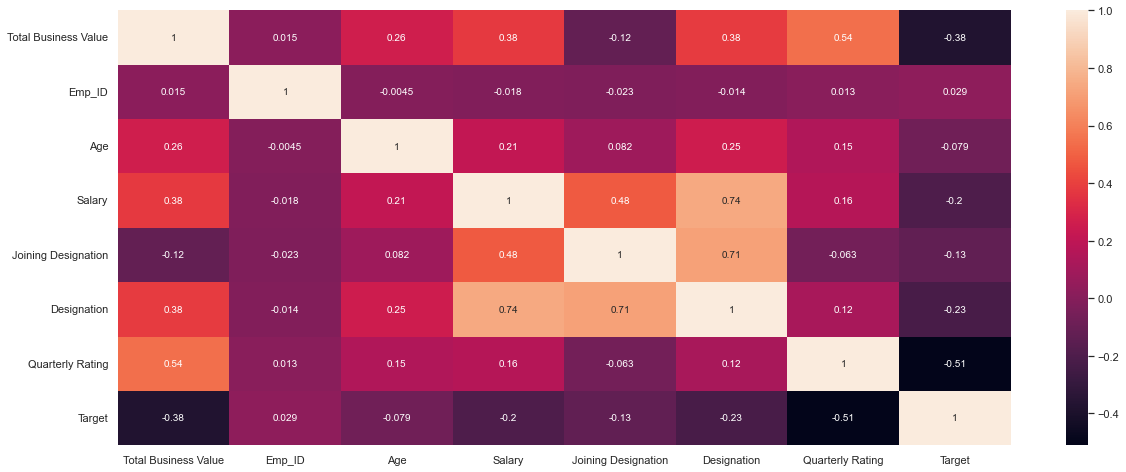

In [9]:
final = pd.concat([total_business_groupby,employees_groupby],axis = 1,join = 'inner')
final

corr = final.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

<a id="5"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>DATA_VISUALIZATION</center></h1>


# 4.Data Visualization

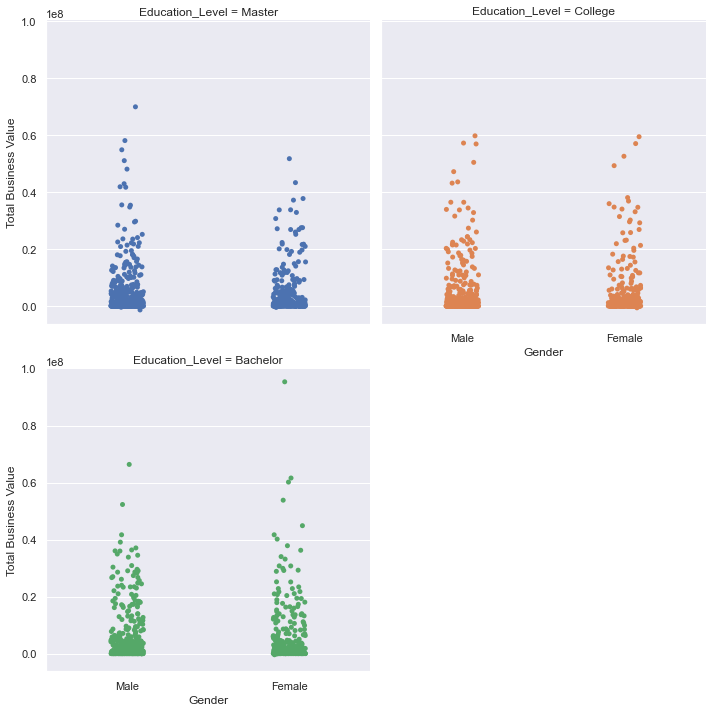

In [10]:
catplot=sns.catplot(x='Gender',y='Total Business Value',hue = 'Education_Level',data = final,col = 'Education_Level',col_wrap = 2)
catplot.set(xlabel='Gender',ylabel='Total Business Value')

C:\Users\Twin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


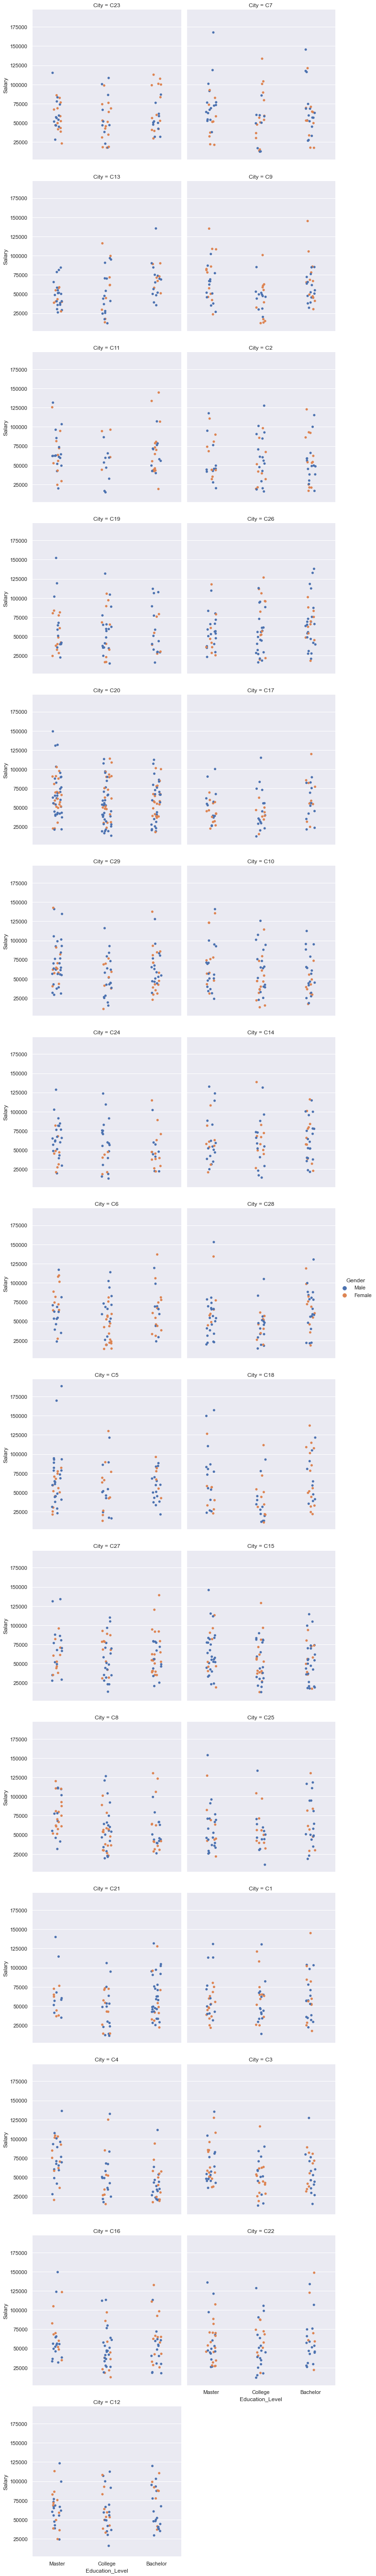

In [11]:
sns.catplot('Education_Level','Salary',data = final,hue = 'Gender',col = 'City',col_wrap = 2)

[Text(0.5, 0, 'Designation'), Text(0, 0.5, '')]

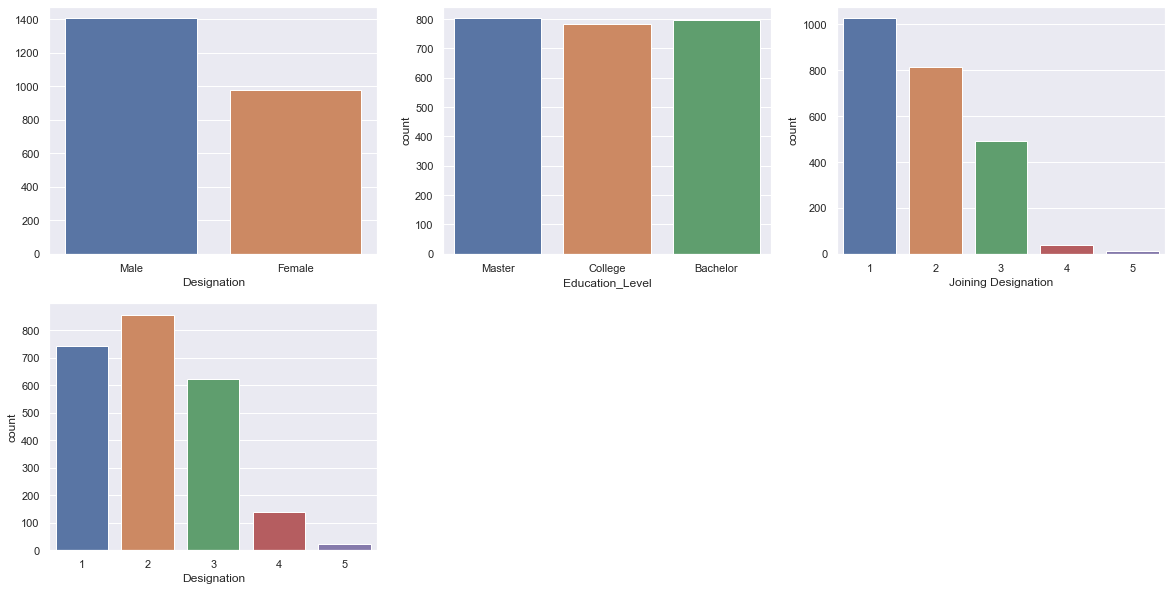

In [12]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
count_plot=sns.countplot(x='Gender',data = final)
count_plot.set(xlabel='Gender',ylabel='')

plt.subplot(232)
sns.countplot(x='Education_Level',data = final)
count_plot.set(xlabel='Education_Level',ylabel='')

plt.subplot(233)
sns.countplot(x='Joining Designation',data = final)
count_plot.set(xlabel='Joining Designation',ylabel='')

plt.subplot(234)
sns.countplot(x='Designation',data = final)
count_plot.set(xlabel='Designation',ylabel='')


[Text(0.5, 0, 'City'), Text(0, 0.5, '')]

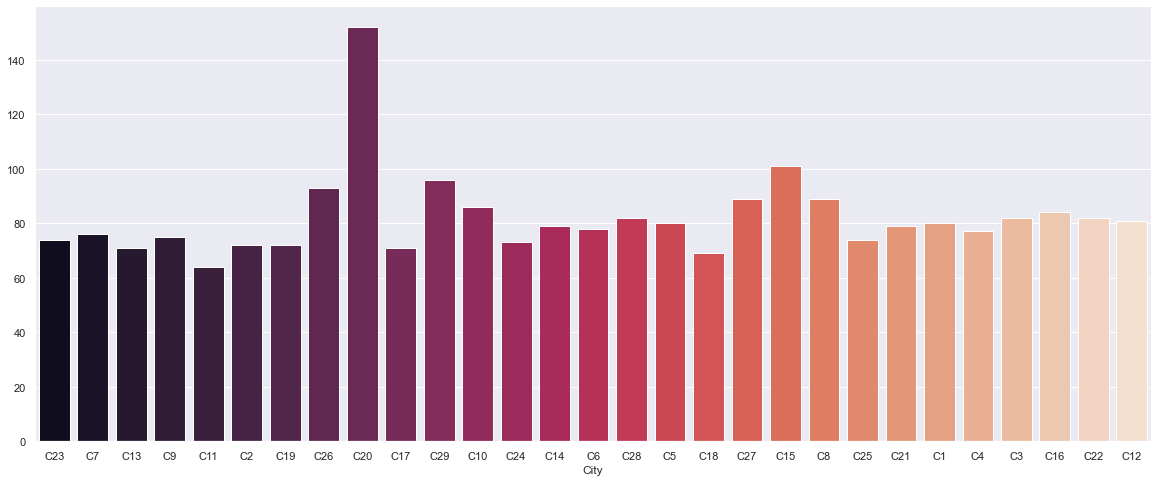

In [13]:
plt.figure(figsize = (20,8))
count_plot=sns.countplot(x='City',data = final,palette= 'rocket')
count_plot.set(xlabel='City',ylabel='')

[Text(0.5, 0, 'Target'), Text(0, 0.5, '')]

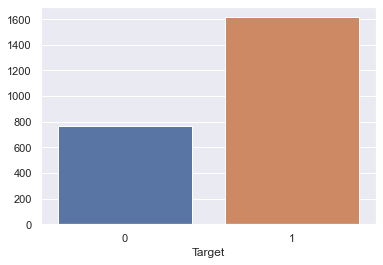

In [14]:
count_plot=sns.countplot(x='Target',data = final)
count_plot.set(xlabel='Target',ylabel='')

In [15]:
final['Quarterly Rating'].unique()

array([2, 1, 4, 3], dtype=int64)

In [16]:
final ['Gender'] = pd.get_dummies(final['Gender'],drop_first = True)
final

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1715580,1,28,1,C23,Master,57387,1,1,2,1
1,0,2,31,1,C7,Master,67016,2,2,1,0
2,350000,4,43,1,C13,Master,65603,2,2,1,1
3,120360,5,29,1,C9,College,46368,1,1,1,1
4,1265000,6,31,0,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,21748820,2784,34,1,C24,College,82815,2,3,4,0
2377,0,2785,34,0,C9,College,12105,1,1,1,1
2378,2815090,2786,45,1,C19,College,35370,2,2,1,1
2379,977830,2787,28,0,C20,Master,69498,1,1,1,1


In [17]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

final['City'] = label.fit_transform(final['City'])

final['Education_Level'] = label.fit_transform(final['Education_Level'])

In [18]:
final.head()

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1715580,1,28,1,15,2,57387,1,1,2,1
1,0,2,31,1,26,2,67016,2,2,1,0
2,350000,4,43,1,4,2,65603,2,2,1,1
3,120360,5,29,1,28,1,46368,1,1,1,1
4,1265000,6,31,0,2,0,78728,3,3,2,0


[Text(0.5, 0, 'Total Business Value'), Text(0, 0.5, '')]

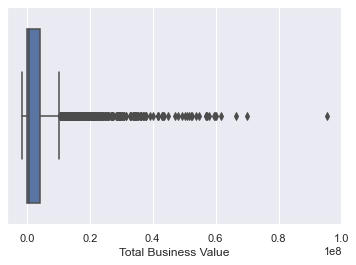

In [19]:
box_plot=sns.boxplot(x='Total Business Value',data = final)
box_plot.set(xlabel='Total Business Value',ylabel='')

In [20]:
Q1 = final['Total Business Value'].quantile(0.25)
Q3 = final['Total Business Value'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['Total Business Value'] >= Q1 - 1.5 * IQR) & (final['Total Business Value']<= Q3 + 1.5 *IQR)
train1 = final.loc[filter]  
print("data loss percentage {}%".format(((len(final) - len(train1))/len(final))*100))

data loss percentage 14.111717765644688%


[Text(0.5, 0, 'Salary'), Text(0, 0.5, '')]

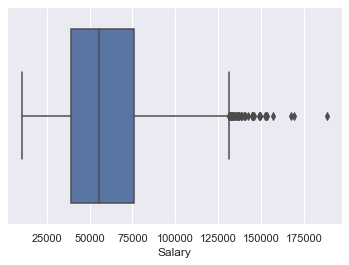

In [21]:
box_plot=sns.boxplot(x='Salary',data=final)
box_plot.set(xlabel='Salary',ylabel='')

In [22]:
Q1 = final['Salary'].quantile(0.25)
Q3 = final['Salary'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['Salary'] >= Q1 - 1.5 * IQR) & (final['Salary']<= Q3 + 1.5 *IQR)
train2 = final.loc[filter]  
print("data loss percentage {}%".format(((len(final) - len(train2))/len(final))*100))

data loss percentage 2.015959680806384%


In [23]:
train2.shape

(2333, 11)

In [24]:
## Get the Fraud and the normal dataset 

not_stay= (train2['Target']== 0 )

stay= (train2['Target']== 1 )

In [25]:

std_x = train2.loc[:,['Total Business Value','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation','Quarterly Rating']]
std_x.shape

(2333, 9)

In [26]:
y = train2.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Target, dtype: int32

In [27]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(std_x,y)

X_res.shape,y_res.shape

((1472, 9), (1472,))

In [28]:
print(sorted(list(final['Age'].unique())))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58]


<a id="6"></a>
<h3 style='background:#92b0ac; border:0; color:black; padding-top:15px'><center>Training and Testing set</center></h1>

In [29]:
#Split data into Train and test format
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state =105)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('shape of Test Xt:{}'.format(x_test.shape))

Shape of Training Xs:(1104, 9)
shape of Test Xt:(368, 9)


<a id="7"></a>
<h1 style='background:#92b0ac; border:0; color:black; padding-top:15px'><center>MODEL BUILDING</center></h1>


In this section we will build and train several machine learning methods for our supervised task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

We are comparing models using the mean absolute error. A baseline model that guessed the median value of the score was off by an average of 25 points.


In [30]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train on the training features
imputer.fit(x_train)

# Transform both training data and testing data
X = imputer.transform(x_train)
X_test = imputer.transform(x_test)

print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))


Missing values in training features:  0
Missing values in testing features:   0
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## 6.1. Scaling Features

The final step before we can start building our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Eventhough, Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines (SVM) and k nearest neighbors (KNN), do require it because they take into account the Euclidean distance between observations.

There are two ways to scale features:
<ul>
<li>
For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.
</li>
<li>
For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.
</li>
</ul>


In [31]:
# Scaling Features

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Convert y to one-dimensional array (vector)
y = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))



### Models throught algorithms

We will compare five different machine learning models using the great Scikit-Learn library:

There are several ways for modeling:
<ul>
<li>
Logistic Regression
</li>
<li>
Support Vector Machine 
</li>
<li>
Random Forest Classifier
</li>
<li>
Gradient Boosting Classifier
    
</li>
<li>
K-Nearest Neighbors Classifier
</li>
</ul>


In [32]:
# variables for saving results
accuracy_result = []
models_result = []

In [33]:
# Function to calculate mean absolute error

def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    accuracy_result.append(model_mae*100)
    
    # Return the performance metric
    #return model_mae
    return {"model_mae": model_mae, "accuracy": model_mae*100, "model_pred": model_pred}

def fit_and_evaluate_model(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    model_accuracy = accuracy_score(y_test, model_pred)
    model_accuracy = str(model_accuracy*100) + ' %'
    
    accuracy_result.append(model_accuracy)
    
    # Return the performance metric
    return {"mae": str(model_mae), "accuracy": model_accuracy, "model_pred": model_pred}

#### Logistic Regression Classifier

In [34]:
models_result.append('Logistic Regression')

log_reg = LogisticRegression()
log_reg_model = fit_and_evaluate_model(log_reg)

In [36]:
log_reg_model_pred=log_reg_model['model_pred']
print('Mean Absolute Error: ' + str(log_reg_model['mae']))
print('Accuracy: ' + str(log_reg_model['accuracy']))

Mean Absolute Error: 0.20652173913043478
Accuracy: 79.34782608695652 %


In [37]:
x_lg_res = X_res['Total Business Value'].values.reshape(-1,1)
y_lg_res = y_res

lr_model = LogisticRegression()
lr_model.fit(x_lg_res,y_lg_res)
y_lr_pred = lr_model.predict(x_lg_res)

print(y_lr_pred)

[1 0 1 ... 0 0 0]


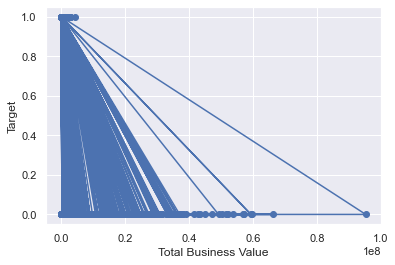

In [38]:
plt.scatter(x_lg_res,y_lg_res)
plt.xlabel('Total Business Value')
plt.ylabel('Target')
plt.plot(x_lg_res,y_lr_pred)

In [39]:
theta0 = lr_model.intercept_
theta1 = lr_model.coef_
theta0, theta1

(array([1.32240741e-11]), array([[-6.25455959e-07]]))

In [40]:
y_lr_pred = lr_model.predict(np.array([80900]).reshape(1,1))
y_lr_pred

array([0])

In [41]:
y_lr_pred = lr_model.predict(np.array([49957]).reshape(1,1))
y_lr_pred

array([0])

### Multivariant logistic regression

In [42]:
attenuation_features = ['Education_Level','Total Business Value','Quarterly Rating']
x_lg_res = X_res[attenuation_features]
y_lg_res = y_res

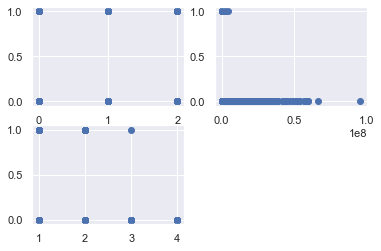

In [43]:
plt.subplot(2,2,1)
plt.scatter(X_res['Education_Level'],y_lg_res)
plt.subplot(2,2,2)
plt.scatter(X_res['Total Business Value'],y_lg_res)
plt.subplot(2,2,3)
plt.scatter(X_res['Quarterly Rating'],y_lg_res)

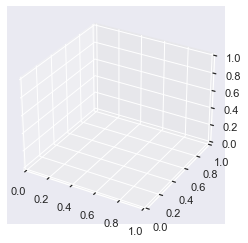

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x1_lg_res = X_res['Education_Level']
x2_lg_res = X_res['Total Business Value']

In [45]:
ax.scatter(x1_lg_res,x2_lg_res,y_lg_res, c='r', marker = 'o')
ax.set_xlabel('Education Level')
ax.set_ylabel('Total Business Value')
ax.set_zlabel('Target')

Text(0.11410640661270847, 0.015287359751546192, 'Target')

In [46]:
ax.scatter(x1_lg_res,x2_lg_res,y_lg_res, c='r', marker = 'o')

#### Support Vector Classification

In [47]:
models_result.append('Support Vector Classification')

svm = SVC(C = 1000, gamma = 0.1)
svm_model = fit_and_evaluate_model(svm)

print('Mean Absolute Error: ' + str(svm_model['mae']))
print('Accuracy: ' + str(svm_model['accuracy']))

Mean Absolute Error: 0.19021739130434784
Accuracy: 80.97826086956522 %


#### Decision Tree

In [48]:
#Defining a function which will give us train and test accuracy for each classifier.
def train_test_error(y_train_data,y_test_data):
    train_error = ((y_train_data==y).sum())/len(y_train_data)*100
    test_error = ((y_test_data==y_test).sum())/len(y_test)*100
    accuracy_result.append(test_error)
    print('Decision Tree Performance: {}'.format(train_error) + " is the train accuracy")
    print('Decision Tree Performance: {}'.format(test_error) + " is the test accuracy")
    

In [49]:
models_result.append('Decision Tree')

dtc = tree.DecisionTreeClassifier()
dtc_model = fit_and_evaluate_model(dtc)

print('Mean Absolute Error: ' + str(dtc_model['mae']))
print('Accuracy: ' + str(dtc_model['accuracy']))
#dtc.fit(X,y)
#train_predict = dtc.predict(X)
#test_predict = dtc.predict(X_test)


Mean Absolute Error: 0.22554347826086957
Accuracy: 77.44565217391305 %


In [50]:
#train_test_error(train_predict , test_predict)

#### Random Forest Classifier

In [51]:
models_result.append('Random Forest Classifier')

rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc_metrics = fit_and_evaluate_model(rfc);
print('Mean Absolute Error: ' + str(rfc_metrics['mae']))
print('Accuracy: ' + str(rfc_metrics['accuracy']))


Mean Absolute Error: 0.18206521739130435
Accuracy: 81.79347826086956 %


In [52]:

#import fig_code
#from fig_code import visualize_tree

#visualize_tree(clf, X, y, boundaries=False);

#### Gradient Boosting Classifier

In [53]:
models_result.append('Gradient Boosting Classifier')

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc_metrics = fit_and_evaluate_model(gbc);
gbc_metrics

{'mae': '0.19293478260869565',
 'accuracy': '80.70652173913044 %',
 'model_pred': array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1,

## All results from algorithms

In [54]:
results = DataFrame({"Accuracy" : accuracy_result } , index = models_result)

results

,Accuracy
Logistic Regression,79.34782608695652 %
Support Vector Classification,80.97826086956522 %
Decision Tree,77.44565217391305 %
Random Forest Classifier,81.79347826086956 %
Gradient Boosting Classifier,80.70652173913044 %


<a id="8"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>MODEL_REBUILDING(ANALYZING_AND_EVALUATION)</center></h1>

# 7. Rebuilding model ( analyzing and evaluation)

## Learning Curves

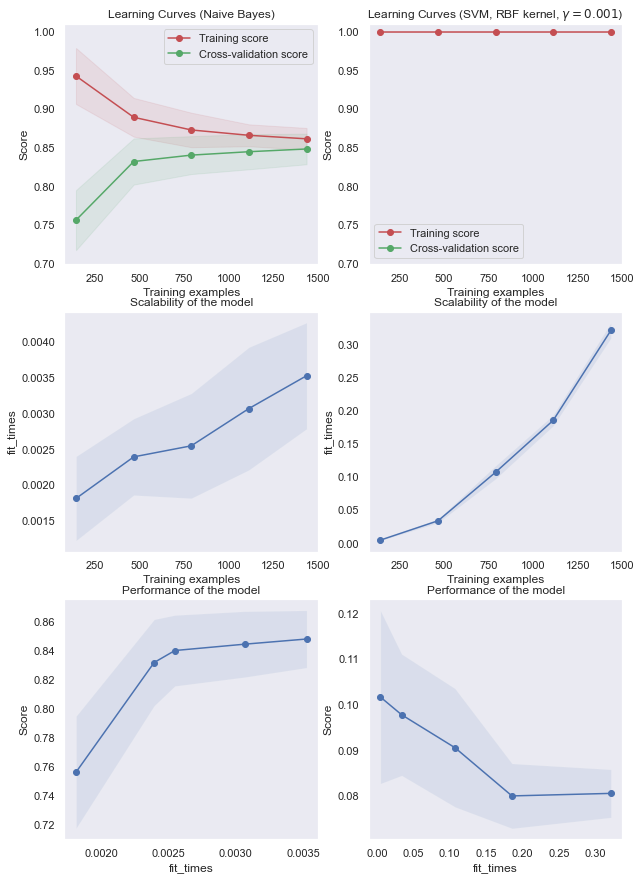

In [55]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svm# svm type of SVC(C = 1000, gamma = 0.1)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

<a id="9"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>CONFUSION_MATRIX</center></h1>


# 8. Confusion Matirx

#### Confusion Matrix
# Compute confusion matrix

In [56]:
cnf_matrix = confusion_matrix(y_test, log_reg_model_pred)

In [ ]:
np.set_printoptions(precision=2)
cnf_matrix

In [58]:

print(classification_report(y_test,log_reg_model_pred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74       177
           1       0.73      0.96      0.83       191

    accuracy                           0.79       368
   macro avg       0.83      0.79      0.78       368
weighted avg       0.83      0.79      0.79       368



<a id="10"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>TEST_PREDICTION</center></h1>


# 9. Prediction on Test Data